In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
data = pd.read_csv("data_cleaned3.csv", header=0)
data




train = data.sample(n=900,random_state=74)
test = data.drop(train.index)


X = train.drop('litho', axis=1).values
y = train['litho'].values.reshape(-1, 1)
y = y.ravel()



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



model = SVC(kernel='poly', degree=3, coef0=30)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))





              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       1.00      1.00      1.00        40
           2       0.89      0.96      0.92        50
           4       1.00      0.93      0.97        15
           5       1.00      0.83      0.91         6
           6       0.97      0.95      0.96        60

    accuracy                           0.96       180
   macro avg       0.98      0.93      0.95       180
weighted avg       0.96      0.96      0.96       180



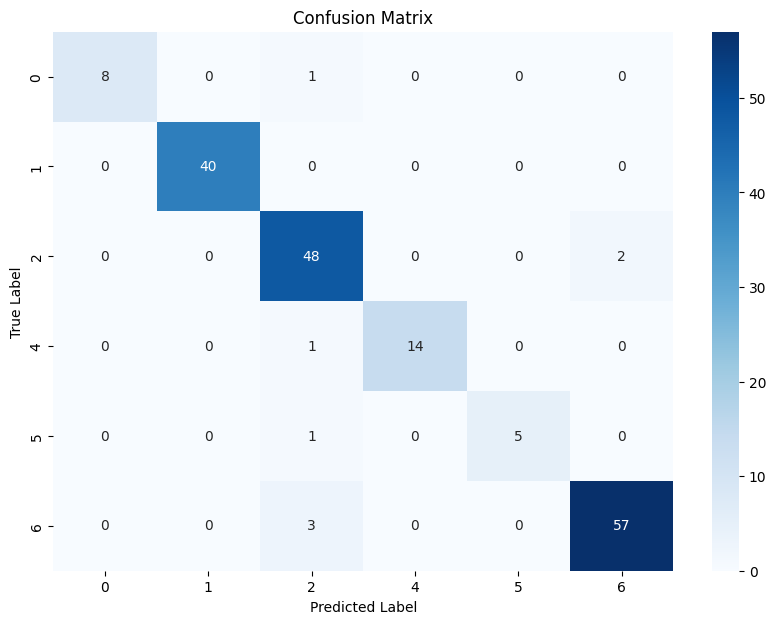

In [5]:

# محاسبه ماتریس سردرگمی
cm = confusion_matrix(y_test, y_pred)

# رسم ماتریس سردرگمی
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
